In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path='/Users/carinamac/Downloads/Data Analytics Real-World Projects in Python/dataset for projects/2-Time Series Data Analysis/individual_stocks_5yr'
company_list=['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data=pd.DataFrame() 
for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df],axis=0)
all_data.shape
#for循环批量读取csv文件，然后拼接成一个DataFrame

(4752, 7)

In [6]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [10]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
all_data['date']=pd.to_datetime(all_data['date'])

## 1. Analyze closing price of all stocks 

In [13]:
tech_list = all_data['Name'].unique()
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

##### enumerate 枚举：
举例：list(enumerate(seasons, start=1))
结果：[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')] 
start默认0，如果写1，则从1开始，枚举所有元素

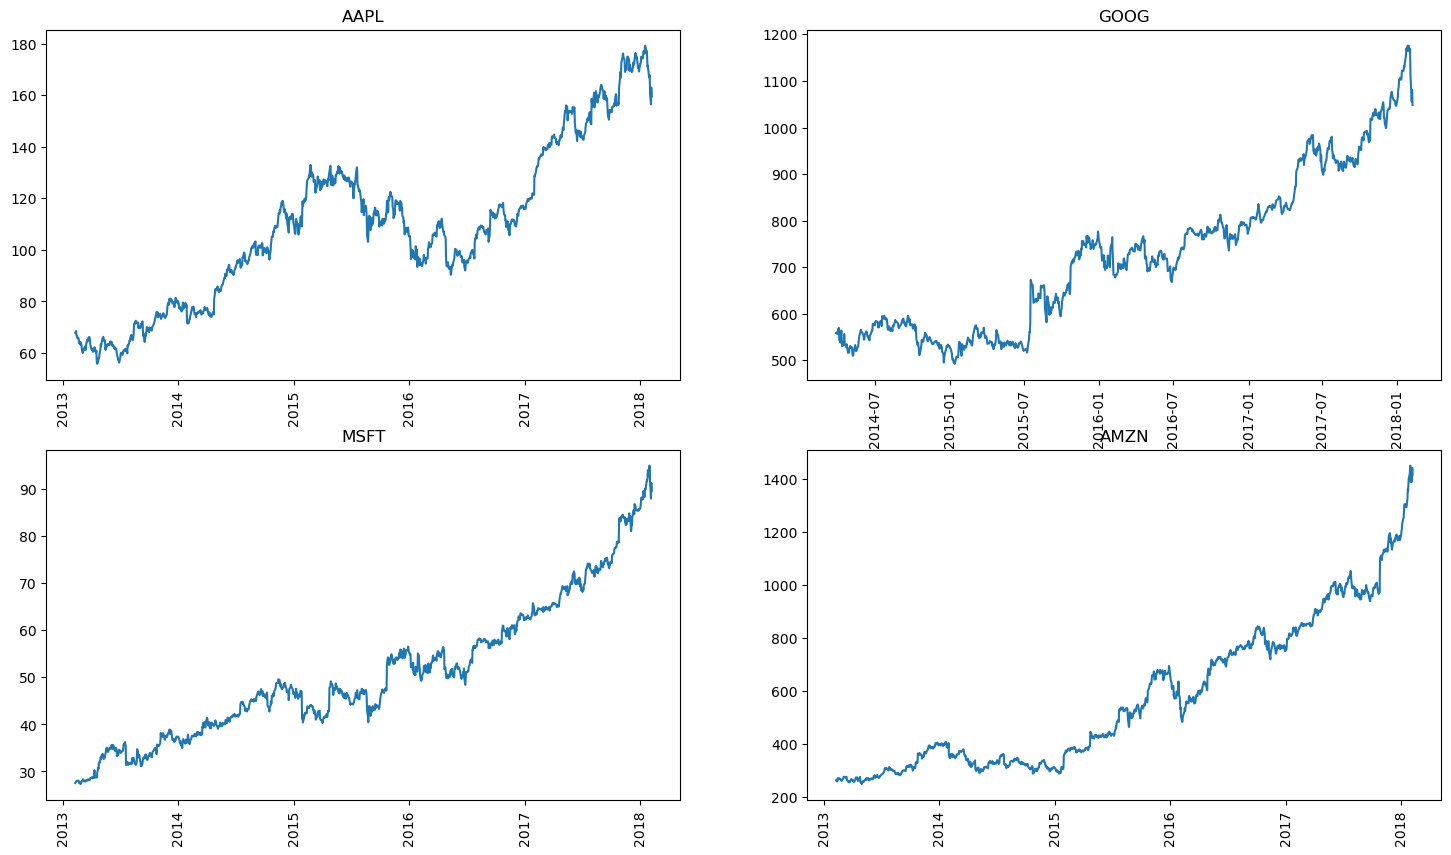

In [12]:
plt.figure(figsize=(18,10))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i) # 画2行2列的图，并放第i个
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation=90)
    plt.title(company)

1. Overall, all four companies' stock prices have increased over the period shown. Apple's stock price has increased the most, from around $60 in 2013 to around $180 in 2018. 

2. There have been some periods of volatility in the stock prices. For example, in 2015, there was a sharp decline in all four companies' stock prices. However, the companies' stock prices have since recovered and continued to rise.

## 2. Analyze the total volume of stock being traded each day

In [14]:
import plotly.express as px

In [21]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()
    
#plotly.express 是 Plotly 的高级 API，旨在简化数据可视化的过程。它提供了一种简单而直观的方式来创建交互性强大的图表，无需过多的代码。

/Users/carinamac/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/Users/carinamac/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/Users/carinamac/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/Users/carinamac/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## 3. Analyze the daily price change in stock 

In [22]:
df=pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [23]:
df['Daily_Price_change']=df['close']-df['open']

In [24]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [25]:
df['1day % return']=((df['close']-df['open'])/df['open'])*100

In [26]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206751
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.719832
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.421264
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042850
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.445600


In [28]:
fig = px.line(df, x='date', y='1day % return', title='AAPL')
fig.show()

1. Apple's stock price has fluctuated significantly over the period from 2013 to 2018. There have been periods of sustained growth, followed by periods of decline. For example, the price rose steadily from mid-2013 to mid-2014, then fell sharply until early 2015. It then rose again until mid-2015, before falling again until early 2016. After that, there was a period of modest growth until the end of the graph.
2. The largest one-day change in Apple's stock price during this period appears to have been a drop of around 6%. This occurred in late August 2015.

## 4. Analyze monthly mean of close features

In [29]:
df2=df.copy()

In [30]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_change    float64
1day % return         float64
dtype: object

In [31]:
df2['date']=pd.to_datetime(df2['date']) 

In [32]:
df2.set_index('date',inplace=True)
# 用某一列作为index，并且原地生效

In [33]:
df2.head()

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206751
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.719832
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.421264
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042850
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.445600


In [36]:
df2['2013-02-08':'2013-02-12']
# date作为index后，可以用来当切片筛选数据

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206751
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.719832
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.421264


<Axes: xlabel='date'>

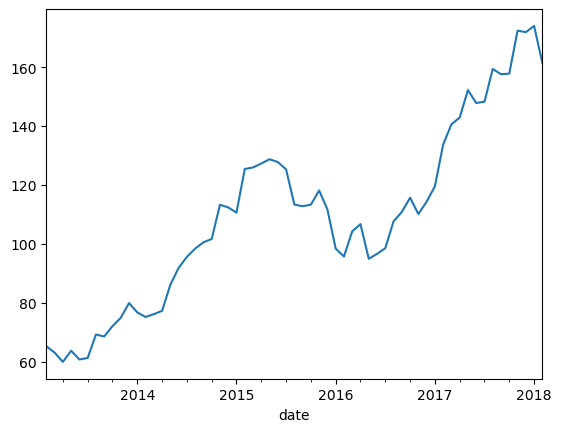

In [39]:
df2['close'].resample('M').mean().plot( )
# 这是使用 Pandas 中的 resample 方法对时间序列数据进行按月重采样，并计算每个月的平均值。

1. Overall, the monthly mean closing price of Apple stock has increased significantly over the period. 
2. The price increase has not been steady. There have been periods of both growth and decline. For example, the price rose steadily from 2014 to 2015, then fell sharply in early 2016. 

## 5. Analyze whether stock prices of these tech companies are correlated with or not 

In [40]:
aapl=pd.read_csv('AAPL_data.csv')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [41]:
amzn=pd.read_csv('AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [42]:
msft=pd.read_csv('MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [43]:
goog=pd.read_csv('GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [44]:
close=pd.DataFrame()
#创建一个空的dataframe，存储四个公司的closing price数据作为column

In [45]:
close['aapl']=aapl['close']
close['amzn']=amzn['close']
close['msft']=msft['close']
close['goog']=goog['close']
close.head()

,aapl,amzn,msft,goog
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


In [46]:
import seaborn as sns

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning

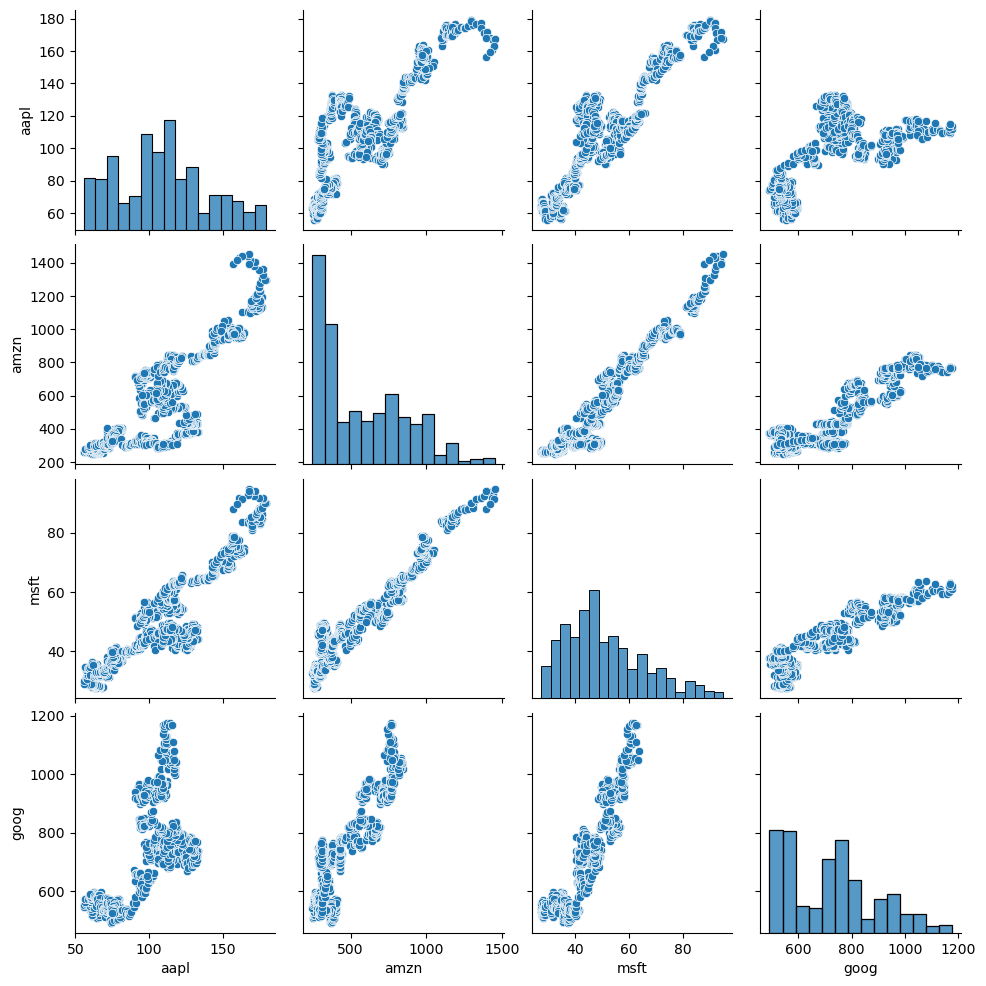

In [48]:
sns.pairplot(data=close)

`sns.pairplot` 是 seaborn 库中的一个函数，用于绘制数据集中各个数值型变量两两之间的关系图。该函数生成一个矩阵，对角线上是每个变量的直方图，而矩阵中其他位置是两两变量之间的散点图或其他双变量图，有助于直观地观察变量之间的关系、分布和可能的趋势。这种图形通常用于探索数据集中的多个变量之间的相关性。

<Axes: >

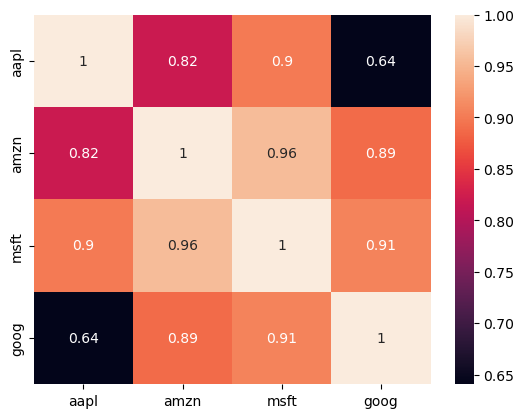

In [52]:
sns.heatmap(close.corr(),annot=True)

1. Overall, the four tech companies show close correlation relationship with each other in closing prices. 
2. The correlation beweetn Microsoft and Amazon is stronger than others, up to 0.96.
3. Among the four companies, Apple has the lowest correlation (0.64) with Google.

## 6. Analyze daily return of each stock & how they are co-related

In [56]:
 aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [58]:
data=pd.DataFrame()

In [60]:
data['aapl_change']=((aapl['close']-aapl['open'])/aapl['open'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['open'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['open'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['open'])*100

In [61]:
data.head() 

,aapl_change,amzn_change,msft_change,goog_change
0,0.206751,0.210406,0.731261,-1.679577
1,0.719832,-2.275836,0.759494,-0.215609
2,-2.421264,-0.189051,0.000000,-1.749899
3,-0.042850,3.035981,0.358038,1.512413
4,0.445600,0.699405,0.429799,0.335158


/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning

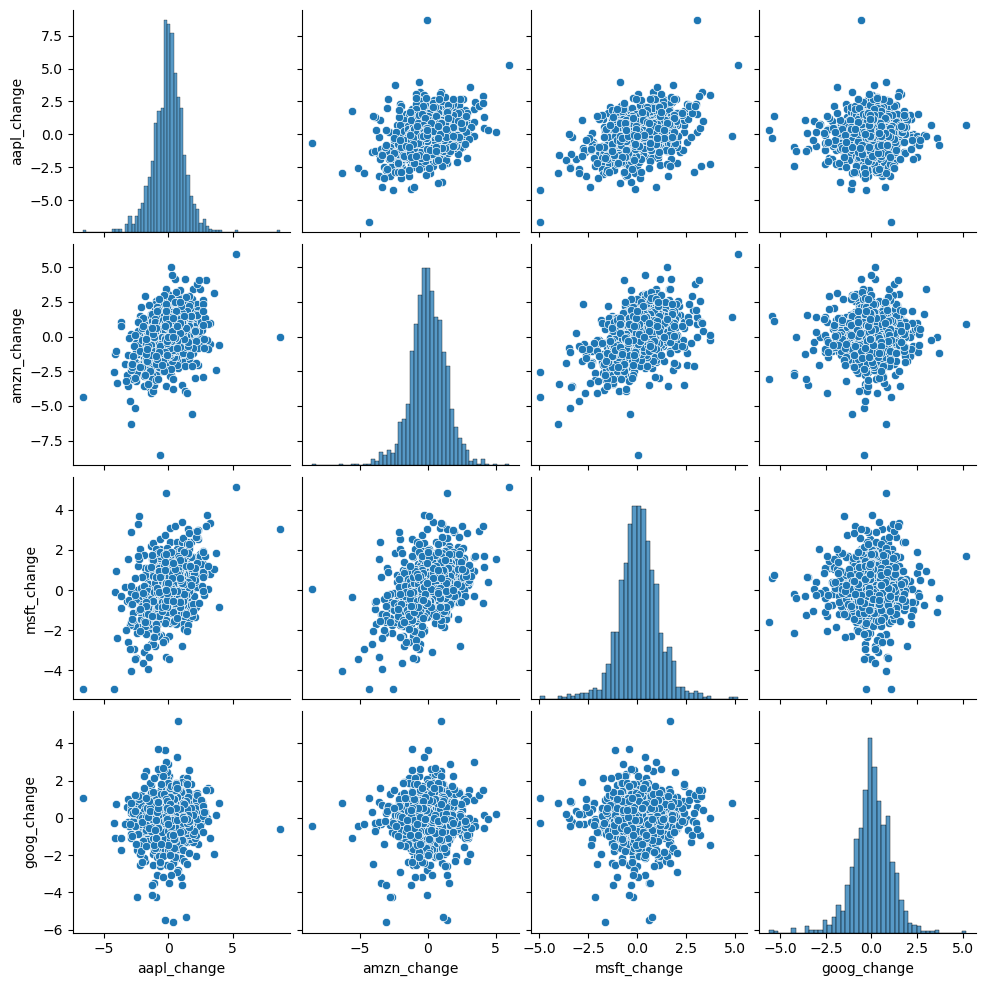

In [62]:
sns.pairplot(data)

<Axes: >

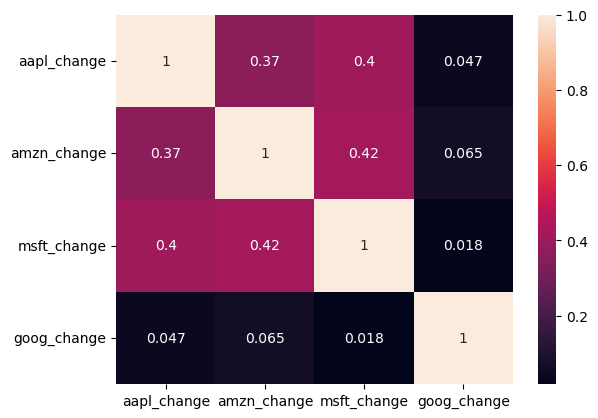

In [64]:
sns.heatmap(data.corr(),annot=True)

There is a higher correlation (0.42) between Amazon and Microsoft, similar as the conlusion drawn from the closing pirce heatmap

## 7. Value at Risk Analysis for Tech companies

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/carinamac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



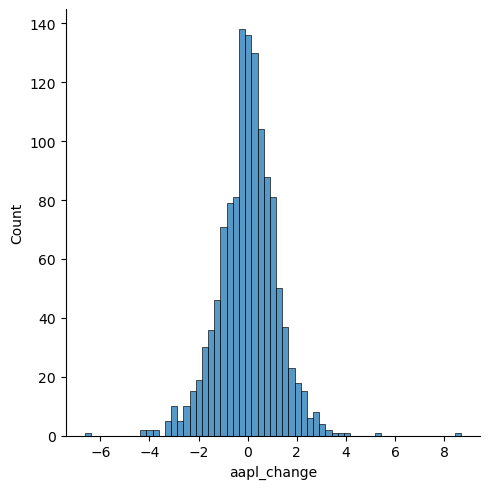

In [71]:
sns.displot(data['aapl_change'])

# sns.displot 是 seaborn 库中用于绘制单变量分布的函数。dis = distribution

在正态分布下，68%，95%，99.7%的数据分别落在均值附近的一个、两个和三个标准差范围内。这是由正态分布的性质决定的，也称为“68-95-99.7法则”或“三σ法则”。

具体计算方法如下：

1. **68%的数据：** 在正态分布下，约68%的数据落在均值（μ）附近的一个标准差（σ）范围内，即\[ μ - σ, μ + σ \]。

2. **95%的数据：** 约95%的数据落在均值附近的两个标准差范围内，即\[ μ - 2σ, μ + 2σ \]。

3. **99.7%的数据：** 约99.7%的数据落在均值附近的三个标准差范围内，即\[ μ - 3σ, μ + 3σ \]。

这些区间是根据正态分布的对称性和概率密度函数的性质得出的。在实际应用中，这个法则提供了对数据分布的快速估计，尤其是在了解数据分布形状和变异程度时非常有用。

In [66]:
data['aapl_change'].std()

# 标准差为1.18意味着大部分的股价变化数据点（大约68%）落在均值附近的一个标准差范围内
# 标准差：衡量数据点相对于均值的平均偏离程度，是一种常见的离散度量。

1.186305740607294

In [67]:
data['aapl_change'].std()*2

# 大约95%的数据点落在两个标准差范围内
# 标准差的两倍通常被认为是异常值的界限。超出这个范围的数据点可能被视为潜在的异常值。

2.372611481214588

In [68]:
data['aapl_change'].std()*3

# 大约99.7%的数据点落在三个标准差范围内
# 标准差的三倍通常更严格，用于检测极端的异常值。超出这个范围的数据点可能是非常罕见的离群值。

3.5589172218218823

In [72]:
data['aapl_change'].quantile(0.1)

-1.4046525192849824

`data['aapl_change'].quantile(0.1)` 的值为 `-1.4046525192849824` 表示 'aapl_change' 列的数据分布中，排在第 10% 的位置的数值。简单来说，大约有 10% 的数据点在 'aapl_change' 列中小于或等于这个值。

在金融数据（比如股票价格变动）的背景下，这个分位数值可能代表分布的下边缘，意味着约 10% 的观测值在这个值以下，显示了数据的离散程度。这有助于理解数据的分布情况，以及了解数据的变异性或风险。

In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl_change,1259.0,0.013851,1.186306,-6.633066,-0.653719,0.042248,0.720582,8.696110
amzn_change,1259.0,0.017927,1.350358,-8.561460,-0.732929,-0.002623,0.859899,5.977407
msft_change,1259.0,0.087680,1.059330,-4.922737,-0.506661,0.061106,0.708245,5.109909
goog_change,975.0,-0.000663,1.084408,-5.617875,-0.548933,0.024957,0.677204,5.200646


 在描述统计信息中，25%、50%、75% 分别表示数据的四分之一数位，中位数，和四分之三数位。这三个值分别对应数据分布的下四分之一点、中点和上四分之一点。

- **25%（下四分之一位）：** 表示数据中有25%的观测值小于或等于这个值，即数据的第一四分之一点。
  
- **50%（中位数）：** 表示数据中有50%的观测值小于或等于这个值，即数据的中点或者说是第二四分之一点。

- **75%（上四分之一位）：** 表示数据中有75%的观测值小于或等于这个值，即数据的第三四分之一点。

这三个值是描述数据分布位置的重要统计量，通过它们可以了解数据的中心趋势和散布情况。